<a href="https://colab.research.google.com/github/Bijayanee/CI_Projects/blob/main/Adaline_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load built-in dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
class ADALINE(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [4]:
model = ADALINE(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.4621
Epoch 20, Loss: 0.3121
Epoch 30, Loss: 0.2253
Epoch 40, Loss: 0.1703
Epoch 50, Loss: 0.1343
Epoch 60, Loss: 0.1103
Epoch 70, Loss: 0.0943
Epoch 80, Loss: 0.0835
Epoch 90, Loss: 0.0761
Epoch 100, Loss: 0.0710


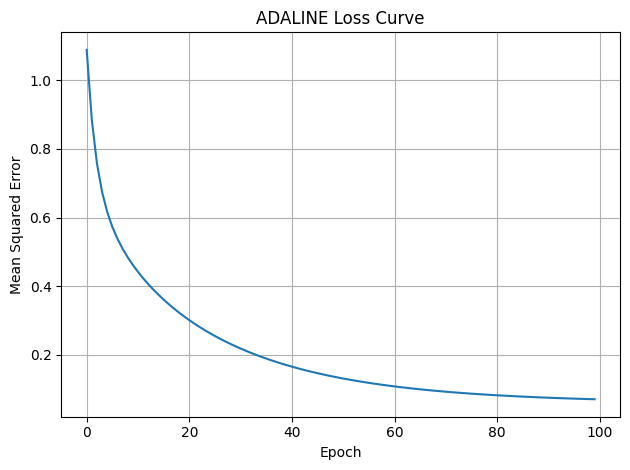

In [5]:
plt.plot(losses)
plt.title("ADALINE Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    predictions = (test_outputs >= 0.5).float()  # Threshold output
    accuracy = (predictions == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")


Test Accuracy: 97.37%
